# Machine Learning Customer Segmentation Project

In this project, we will perform an unsupervised Machine Learning algorithm to cluster the clients of a grocery store into groups that reflect similarities. This kind of segmentation (clustering) helps the business to modify products and prices according to the distinct needs and behaviors of the customers, it also helps to identify different types of customers.

# 1. Definition of the business problem

Customer Segmentation is a detailed analysis of a company’s type of customers, it helps a business to better understand its customers and makes it easier for them to modify products and prices according to their specific needs and behaviors.

For example, instead of spending money to market a new product to every customer in the company’s database, a company can analyze which customer segment is most likely to buy the product and then offer the promotion only to that particular segment.

Here are some of the main benefits of customer segmentation:

+ Better understanding the clientele;
+ Targeted marketing promotions to the right people;
+ Focuses on the most profitable customers.

# 2. Data Cleaning

## 2.1 Loading Data

In [1]:
# Loading libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn import metrics

# Ignore warnings
import warnings
warnings.filterwarnings("ignore")

In this project we will use a public dataset available at Kaggle: https://www.kaggle.com/code/karnikakapoor/customer-segmentation-clustering

In [2]:
# Download the Dataset from Kaggle
import kagglehub

# Download the latest version
path = kagglehub.dataset_download("imakash3011/customer-personality-analysis")

# Load the Dataset
data = pd.read_csv(f"{path}/marketing_campaign.csv", sep="\t")

## 2.2 Initial Data Understanding

In [3]:
# Visualize the first 5 rows
data.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0


In [4]:
# Information about the shape and type of data of the Dataset 
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

Meaning of the features

+ ID: Customer's unique identifier
+ Year_Birth: Customer's birth year
+ Education: Customer's education level
+ Marital_Status: Customer's marital status
+ Income: Customer's yearly household income
+ Kidhome: Number of childthe ren in customer's household
+ Teenhome: Number of teenagers in customer's household
+ Dt_Customer: Date of customer's enrollment with the company
+ Recency: Number of days since customer's last purchase
+ Complain: 1 if the customer complained in the last 2 years, 0 otherwise
+ MntWines: Amount spent on wine in last 2 years
+ MntFruits: Amount spent on fruits in last 2 years
+ MntMeatProducts: Amount spent on meat in last 2 years
+ MntFishProducts: Amount spent on fish in last 2 years
+ MntSweetProducts: Amount spent on sweets in last 2 years
+ MntGoldProds: Amount spent on gold in last 2 years
+ NumDealsPurchases: Number of purchases made with a discount
+ the AcceptedCmp1: 1 if customer accepted the offer in the 1st campaign, 0 otherwise
+the  AcceptedCmp2: 1 if customer accepted the offer in the 2nd campaign, 0 otherwise
the + AcceptedCmp3: 1 if customer accepted the offer in the 3rd campaign, 0 otherwisethe 
+ AcceptedCmp4: 1 if customer accepted the offer in the 4th campaign, 0 otherwisethe 
+ AcceptedCmp5: 1 if customer accepted the offer in the 5th campaign, 0 othethe rwise
+ Response: 1 if customer accepted the offer in the last campaign, 0 otherwise
+ NumWebPurchases: Number of purchases made through the company’s website
+ NumCatalogPurchases: Number of purcses made using a catalogue
+ NumStorePurchases: Number of purchases made directly in stores
+ NumWebVisitsMonth: Number of visits to company thewebsite in the last monththo company’s website in the last month

In [5]:
# Confirm that  the ID of the customer appears only once, so it is a primery key (unique identifier).
data['ID'].value_counts().sum()

2240

The dataset has 29 features (columns) of 2240 customers (rows).

From the above output, we see 3 initial tasks to do to clean the Data:

1) There are missing values in Income, we have to deal with them.

2) Dt_Customer is a date (the date the customer joined the database) that is not parsed as DateTime

3) There are some categorical features in our data frame (Education and Marital_Status), so we will need to encode them into numeric forms later.

## 2.3 Dealing with missing values

In [6]:
# We will simply drop the rows that have missing values.
data = data.dropna()

## 2.4 Consider Dt_Customer as a data

In [7]:
# Parse to datetime
data["Dt_Customer"] = pd.to_datetime(data["Dt_Customer"], format='%d-%m-%Y')

In [8]:
data["Dt_Customer"]

0      2012-09-04
1      2014-03-08
2      2013-08-21
3      2014-02-10
4      2014-01-19
          ...    
2235   2013-06-13
2236   2014-06-10
2237   2014-01-25
2238   2014-01-24
2239   2012-10-15
Name: Dt_Customer, Length: 2216, dtype: datetime64[ns]

In [9]:
# We will create a new feature Dt_Customer_Time of how long the customer is registered, considering the difference with the maximum date.
import datetime

date_max = max(data["Dt_Customer"])
date_min = min(data["Dt_Customer"])
print(f"The dates of registrations of customers is between {date_min} and {date_max}")

data["Dt_Customer_Time"] = date_max - data["Dt_Customer"]
data["Dt_Customer_Time"] = data["Dt_Customer_Time"].dt.components.days

The dates of registrations of customers is between 2012-07-30 00:00:00 and 2014-06-29 00:00:00


## 2.5 Encode the categorical features

In [10]:
# Explore the unique values in the categorical features to get a clear idea of the data.
data["Education"].value_counts()

Education
Graduation    1116
PhD            481
Master         365
2n Cycle       200
Basic           54
Name: count, dtype: int64

In [11]:
# Since this is an ordinal categorical feature, we will encode by a number from 1 to 5. This is equivalent to the method of LabelEncoder.
data["Education"]=data["Education"].replace(
    {"Basic":1,
     "2n Cycle":2,
     "Graduation":3,
     "Master":4,
     "PhD":5}
)

In [12]:
data["Marital_Status"].value_counts()

Marital_Status
Married     857
Together    573
Single      471
Divorced    232
Widow        76
Alone         3
Absurd        2
YOLO          2
Name: count, dtype: int64

In [13]:
# We will simplify marital status by the living situation as "Alone" or not. Since we will use numbers 0 or 1, this will become a numerical feature.
data["Alone"]=data["Marital_Status"].replace(
    {"Married":0, "Together":0, "Absurd":1, "Widow":1, "YOLO":1, "Divorced":1, "Single":1, "Alone": 1})

Now all of our categories are of numeric type.

# 3. Feature Enigineering

Above in sections 2.2 and 2.3 we already did some feature engineering. Now we will create the following new features: 

- "Age" to be considered instead of "Year_Birth";
- "Spent" with the total amount spent by the customer;
- "Children" with the cate total children in a housage;
- "Family_size" with the total people in a household;
- "Is_Parent" to indicate parenthood;
- "Proportion" with the proportion of the Income that was Spent.

In [14]:
# Age of customer. Since the maximum date of registration is 2014, we will consider their Age in the last day of 2014 (in 31-12-2014)
data["Age"] = 2014-data["Year_Birth"]
data["Age"]

0       57
1       60
2       49
3       30
4       33
        ..
2235    47
2236    68
2237    33
2238    58
2239    60
Name: Age, Length: 2216, dtype: int64

In [15]:
# Total spent
data["Spent"] = data["MntWines"]+ data["MntFruits"]+ data["MntMeatProducts"]+ data["MntFishProducts"]+ data["MntSweetProducts"]+ data["MntGoldProds"]

In [16]:
# Total children living in the household
data["Children"]=data["Kidhome"] + data["Teenhome"]

In [17]:
# Total members in the household (family size)
data["Family_Size"] = 2 - data["Alone"] + data["Children"]

In [18]:
# Parenthood
data["Is_Parent"] = np.where(data.Children> 0, 1, 0)

In [19]:
# Proportion
data["Proportion"] = data["Spent"]/data["Income"] * 100

In [20]:
# Dropping some redundant features
data = data.drop(["Marital_Status", "Dt_Customer", "Z_CostContact", "Z_Revenue", "Year_Birth", "ID"], axis=1)

# 4. Exploratory Data Analysis

Now that we have only numeric features, let us analyze statistically some features.

In [21]:
# Statistical description of the data
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Education,2216.0,3.459838,1.004825,1.000000,3.000000,3.000000,4.000000,5.000000
Income,2216.0,52247.251354,25173.076661,1730.000000,35303.000000,51381.500000,68522.000000,666666.000000
Kidhome,2216.0,0.441787,0.536896,0.000000,0.000000,0.000000,1.000000,2.000000
Teenhome,2216.0,0.505415,0.544181,0.000000,0.000000,0.000000,1.000000,2.000000
Recency,2216.0,49.012635,28.948352,0.000000,24.000000,49.000000,74.000000,99.000000
MntWines,2216.0,305.091606,337.327920,0.000000,24.000000,174.500000,505.000000,1493.000000
MntFruits,2216.0,26.356047,39.793917,0.000000,2.000000,8.000000,33.000000,199.000000
MntMeatProducts,2216.0,166.995939,224.283273,0.000000,16.000000,68.000000,232.250000,1725.000000
MntFishProducts,2216.0,37.637635,54.752082,0.000000,3.000000,12.000000,50.000000,259.000000
MntSweetProducts,2216.0,27.028881,41.072046,0.000000,1.000000,8.000000,33.000000,262.000000


## 4.1 Data Visualization

### Univariate analysis

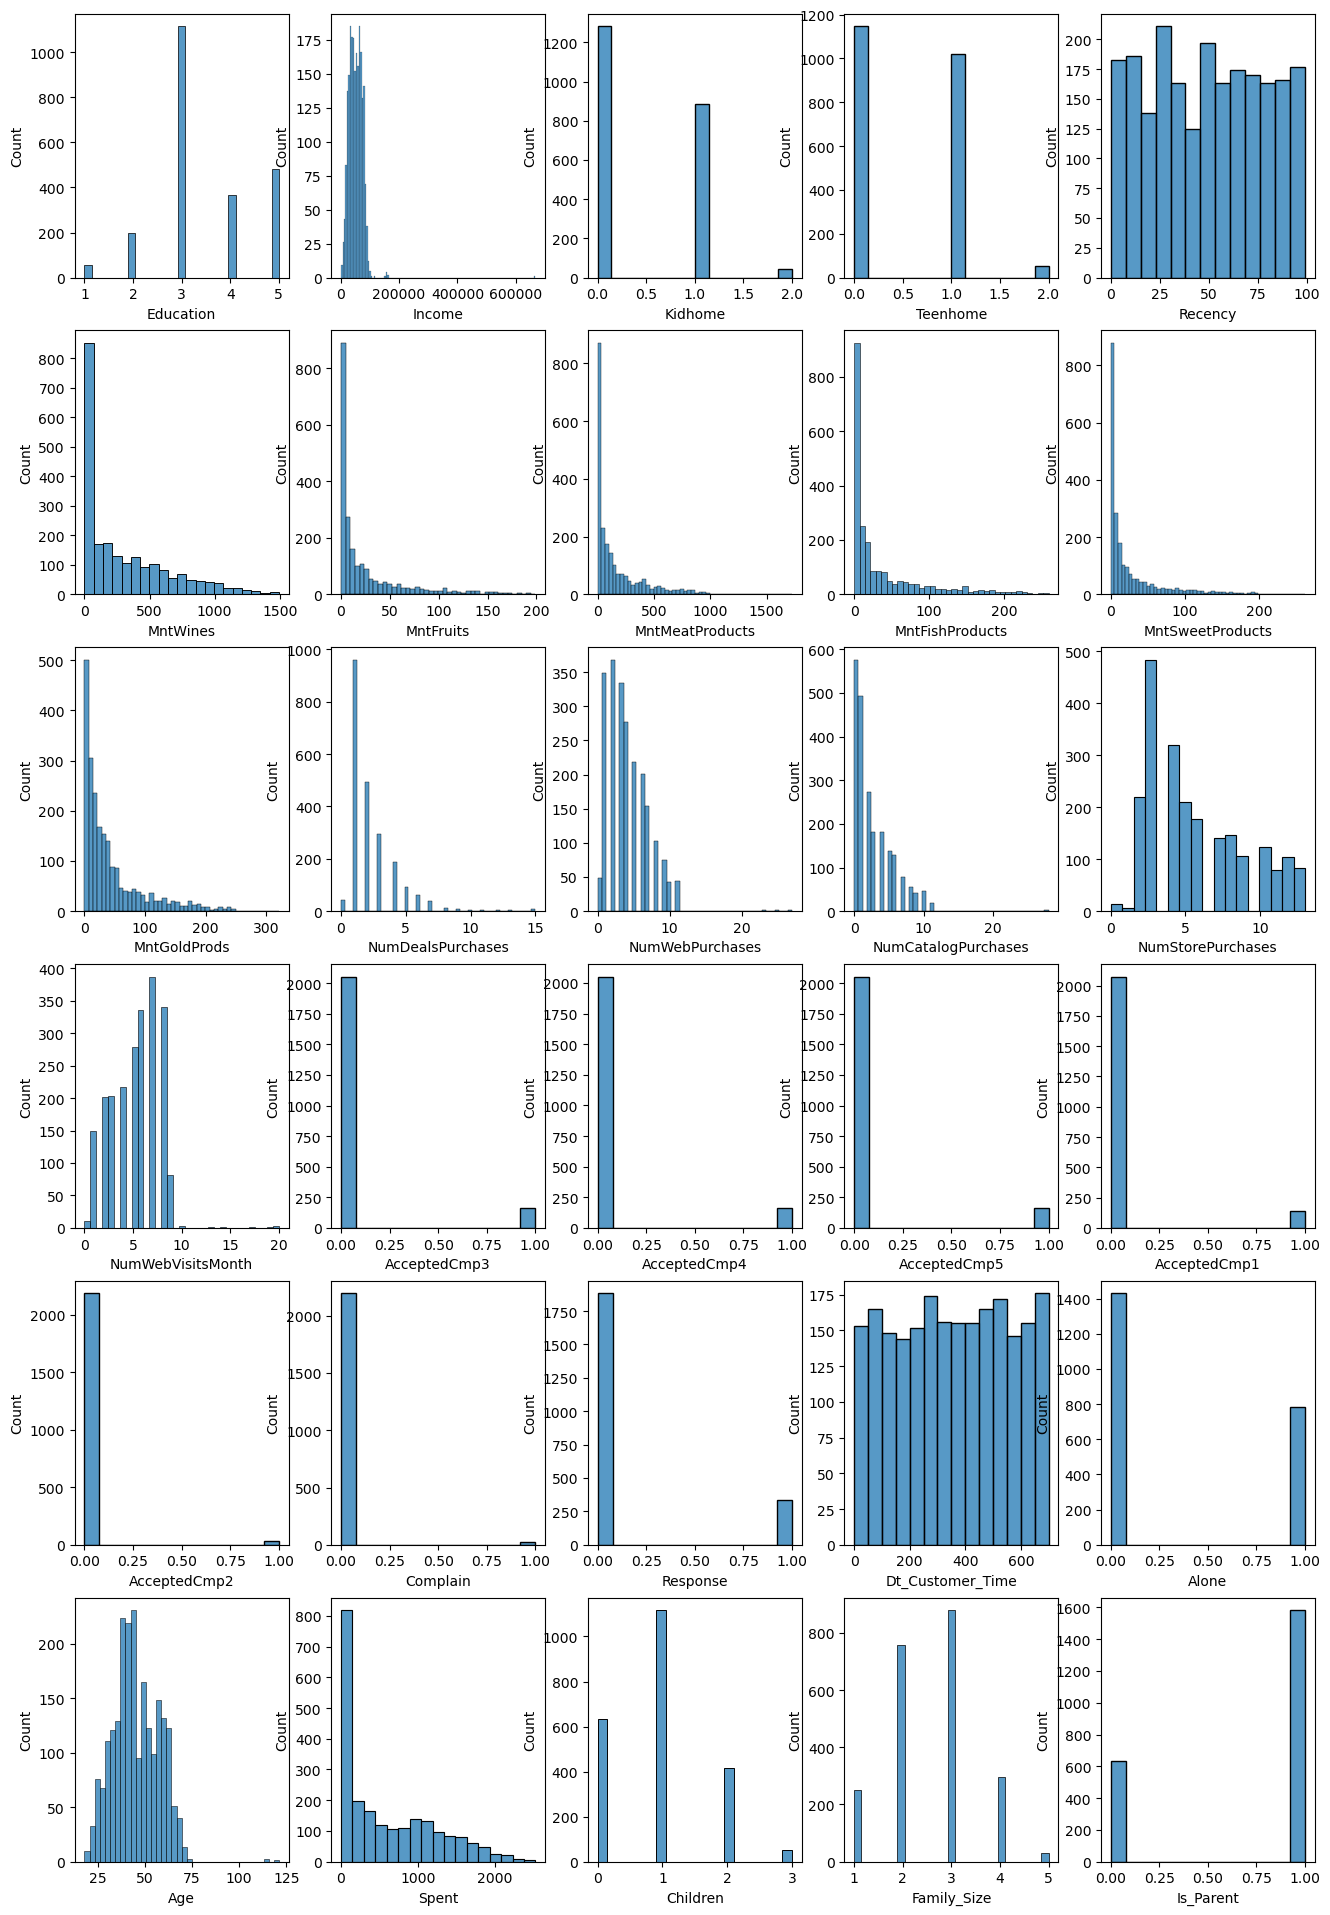

In [22]:
# Plot the distribution of features (histograms)
fig , ax = plt.subplots(6, 5, figsize=(16, 24))
for i in range(5):
    for j in range(6):
        sns.histplot(ax = ax[j,i], data=data, x=data.columns[i+5*j])
plt.show()

### Bivariate analysis

In [ ]:
# Choose some features to plot pairplots
features_to_plot = ["Income", "Recency", "Dt_Customer_Time", "Age", "Spent", "Proportion", "Is_Parent"]

plt.figure()
sns.pairplot(data[features_to_plot])
plt.show()

<Figure size 640x480 with 0 Axes>

In [ ]:
# We see outliers in the Income and Age features, we will remove the outliers by setting a limit on Age and Income. 
data = data[(data["Age"]<100)]
data = data[(data["Income"]<600000)]

In [ ]:
# We still have some outliers with Income greater than 150000. Do they spend a relevant amount?
sns.scatterplot(data=data, x= 'Income', y='Spent')

We decided to keep these 7 outlies with Income greater than 150000.

## 4.2 Correlations between features

In [ ]:
# Let us look at the heat map of correlations between the features
corr= data.corr(numeric_only=True)
plt.figure(figsize=(20,20))  
sns.heatmap(corr)
plt.show()

### Insights from the EDA:

Customers who have higher Incomes tend to Spend more and accept more Campaigns.

Features representing the amount Spent on a product are right-skewed. This means that most of the customers spent lower amounts, while some spent higher amounts of money. Particularly, wine represents the product type with the highest average amount spent.

The store's campaigns are not being effective! The proportion of customers who accepted any of the campaigns is very low. This motivates our clustering analysis. By segmenting the customers, it will be possible to make targeted campaigns, improving this indicator.

Most of the customers have no children. Some of them have 1 kidhome or teenhome. Very few have two. Moreover, most of the customers are graduates and have a partner.

Teenhome and the number of deals purchases are moderately positively correlated. This indicates that customers who have more teenagers at home tend to search for discounts in their purchases.

Campaigns 1 and 5 were effective in achieving higher-income customers concerning the amount spent on wine and meat products. It was possible to see that the proportion of customers who accepted campaigns was higher in higher amounts spent.

# 5. Data Preprocessing

We have already encoded the categorical features, so we have only numerical categories. The next step is to scale the features using the Standard Scaler.

In [ ]:
# Creating a copy of data
ds = data.copy()

# Creating a subset of the dataframe dropping the features on deals accepted, promotions and alone.
cols_del = ['AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1','AcceptedCmp2', 'Complain', 'Response']
ds = ds.drop(cols_del, axis=1)

In [ ]:
# Scaling with Standard Scaler
scaler = StandardScaler()
scaler.fit(data)
scaled_ds = pd.DataFrame(scaler.transform(data))

In [ ]:
# Visualize the Dataframe to be used for further modeling.
scaled_ds.head()

# 6. Dimensionality reduction

Our dataset has a large number of features and the higher the number of features, the harder it is to work with it. Many of these features are correlated and hence redundant. This is why we will be performing dimensionality reduction on the selected features before doing the classification (clustering).

**Principal component analysis (PCA)** is a technique for reducing the dimensionality of such datasets, increasing interpretability but at the same time minimizing information loss.

In [ ]:
# Initiating PCA to reduce the dimentions of features to 3
pca = PCA(n_components=3)

# Fit to our dataset
pca.fit(scaled_ds)

# Consider the new dataset with 3 columns
PCA_ds = pd.DataFrame(pca.transform(scaled_ds), columns = ['Col 1', 'Col 2', 'Col 3'])
PCA_ds.describe().round(4)

In [ ]:
# A 3D Projection Of Data In The Reduced Dimension
from mpl_toolkits.mplot3d import Axes3D

x = PCA_ds['Col 1']
y = PCA_ds['Col 2']
z = PCA_ds['Col 3']

# To plot
fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(111, projection="3d")
ax.scatter(x,y,z, marker="o" )
plt.show()

# 7. Clustering

Now that we have reduced the attributes to three dimensions, we will perform the segregation task with the algorithm **K-means**. First, we want to see what is the ideal number of clusters using the Elbow Method.

In [ ]:
# Elbow method to find the number of clusters to form.
from yellowbrick.cluster import KElbowVisualizer

Elbow_M = KElbowVisualizer(KMeans())
Elbow_M.fit(PCA_ds)
Elbow_M.show()

This method indicates that k=5 is an optimal number of clusters for this data.

In [ ]:
# Initiating the K-means model:
kmeans = KMeans(n_clusters=5, random_state=2)
# Fit model and predict clusters
kmeans.fit(PCA_ds)
kmeans_pred = kmeans.labels_

# Adding the Clusters to the dataset PCA_ds and to the original dataframe
PCA_ds["Clusters"] = kmeans_pred
data["Clusters"]= kmeans_pred

In [ ]:
#Plotting the clusters
fig = plt.figure(figsize=(8,6))
ax = plt.subplot(111, projection='3d')
ax.scatter(x, y, z, s=50, c=PCA_ds["Clusters"], marker='o', cmap = 'rainbow_r')
plt.savefig('3d_scatterplot.png')
plt.show()

# 8. Analysis of the clusters
The purpose of this section is to study the patterns in the clusters formed before.

In [ ]:
# Choosing five colors to visualize (and rename) the Clusters
pal = ['blue', 'green', 'red', 'pink', 'orange']

# Plotting countplot of clusters
sns.countplot(x=data["Clusters"].sort_values(), palette= pal)
plt.title("Distribution Of The Clusters")
plt.show()

In [ ]:
# Dictionary of colors for the Clusters
data["Clusters"] = data["Clusters"].astype(str)

pal = {'0': 'blue', '1': 'green', '2': 'red', '3': 'pink', '4': 'orange'}

### Income and Spent inside each group

In [ ]:
# Income vs Spent inside each cluster
plt.figure(figsize=(8,6))
sns.scatterplot(data = data,x=data["Income"], y=data["Spent"],hue=data["Clusters"], palette = pal)
plt.title('Spent x Income inside each group')
plt.legend()
plt.savefig('spent_income.png')
plt.show()

In [ ]:
# Visualize separately the Income in each group
plt.figure()
sns.boxplot(x=data["Clusters"].sort_values(), y=data["Income"], palette=pal)
plt.title('Income inside each group')
plt.show()

In [ ]:
# Visualize separately the Spent in each group
plt.figure()
pl=sns.boxplot(x=data["Clusters"].sort_values(), y=data["Spent"], palette=pal)
plt.title('Spent inside each group')
plt.show()

In [ ]:
# Removing one outlier in Group 4 for Proportion
data = data[(data["Proportion"]<20)]

# Visualize the Proportion in each group
plt.figure()
sns.boxplot(x=data["Clusters"].sort_values(), y=data["Proportion"], palette=pal)
plt.title('Proportion of spent inside eachgroup')
plt.show()

The visualization above shows the following **initial clusters patterns**:

Group 3 (Pink): very low spending & very low income
Group 0 (Blue): low spending & low income

Group 2 (Red): medium spending & medium income

Group 1 (Green):  high spending & high income

Group 4 (Orange): very high spending & very high income

In [ ]:
#Creating a feature to get a sum of accepted promotions 
data["Total_Promos"] = data["AcceptedCmp1"]+ data["AcceptedCmp2"]+ data["AcceptedCmp3"]+ data["AcceptedCmp4"]+ data["AcceptedCmp5"]

# The effect of the Promotions in each group
plt.figure()
sns.countplot(data=data, x="Total_Promos", hue="Clusters", palette=pal)
plt.title('Number of adherence to promotions inside each group')
plt.show()

Nobody participated in all the campaings. Group 4 (Orange) has higher participation in Campaings. 

In [ ]:
# The number of deals in each group
plt.figure()
sns.boxplot(y=data["NumDealsPurchases"],x=data["Clusters"].sort_values(), palette= pal)
plt.title('Number of purchases inside each group')
plt.show()

The deals has best outcome with group 1 (green) and group 3 (pink). However, our star customers group 4 (orange) are not much into the deals. Nothing seems to attract group 2 (red) to deals.

### Personal information inside each group

In [ ]:
# List of features we consider as personal information
Personal = ["Kidhome", "Teenhome", "Dt_Customer_Time", "Age", "Children", "Family_Size", "Is_Parent", "Education", "Alone"]

In [ ]:
Personal[4]

In [ ]:
# Plot the distribution of personal information (boxplots)
fig , ax = plt.subplots(3, 3, figsize=(12, 12))
for i in range(3):
    for j in range(3):
        sns.boxplot(ax = ax[j,i], x=data["Clusters"].sort_values(), y=data[Personal[i+3*j]], palette=pal)
plt.show()

### Spent types inside each group

In [ ]:
# List of spent in product types
Product_types = [ "MntWines", 'MntFruits', "MntMeatProducts", "MntFishProducts", "MntSweetProducts", "MntGoldProds"] 

# Plot the distribution of spent types (boxplots)
fig , ax = plt.subplots(2, 3, figsize=(14, 8))
for i in range(3):
    for j in range(2):
        sns.boxplot(ax = ax[j,i], x=data["Clusters"].sort_values(), y=data[Product_types[i+2*j]], palette=pal)
plt.show()

### Type of purchases inside each group

In [ ]:
# List of spent in product types
Purchase_types = ['NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases'] 

# Plot the distribution of spent types (boxplots)
fig , ax = plt.subplots(2, 2, figsize=(14, 8))
for i in range(2):
    for j in range(2):
        sns.boxplot(ax = ax[i,j], x=data["Clusters"].sort_values(), y=data[Purchase_types[i+2*j]], palette=pal)
plt.show()

# 9. Business insights and Recomendations to increase sales

### 9.1 Conclusions about the groups, to better understand the clientele

I divided the customers into 5 groups according to their information and purchasing behaviors. These five groups have the following features:

Group 0 (Blue)
+ Customers in this cluster have a relatively low income and low monetary spending.
+ They do not make many purchases.
+ Many have one or more children, and they are not particularly inclined to accept campaigns.

Group 1 (Green)
+ Customers in this cluster have a relatively high income and monetary spending.
+ They prefer web purchases.
+ Some are receptive to campaigns, and many have one child.

Group 2 (Red):
+ This cluster consists of customers with an intermediary income and monetary spending.
+ They prefer both store and web purchases.
+ Most have one or more children, and they are not very likely to accept campaigns.

Group 3 (Pink):
+ This cluster includes younger individuals with very low income, low frequency, and low monetary spending.
+ They make relatively small purchases.
+ Most have one child, and they are not receptive to campaigns.

Group 4 (Orange): 
+ These customers have a very high average income, moderate frequency and vary high monetary spending.
+ They prefer in-store and catalog purchases and tend to visit the web less frequently.
+ They are open to accepting campaign offers and typically have no children.

### 9.2 Recommendations for the Business

We recommend:

+ The creation of a loyalty program in order to assign distinct promotions to different groups of customers.
+ To offer promotions for members of Groups 1 (blue) and Group 3 (pink), they can be identified as groups with more children at home. Maybe this grocery store is seen as a store for people with high Income, therefore does not encourage low Income people to buy there.
+ We recommend promotions for basic food products, maybe family packs to encourage Groups 1 (blue) and 3 (pink) to spend more in this store.
+ To Group 4 (Orange) we recommend offering promotions of Meal, Fishes, Fruits, since they already spent more on Wines and their Income allows them to spend more on other types of products.
+ Act to decrease the Recency time, which is a high. For example, offering better prices for people who buy twice in the same month.

# 10. Conclusion

In this project, we performed unsupervised clustering, for this task we used dimensionality reduction (PCA) followed by K-means algorithm, that came with 5 clusters. 

We studied this segmentation according to similarities with the income/spent and family structure.

Finally, we recommend a marketing strategies with differente promotions for different groups.